# **Análisis de Componentes Principales (PCA): De la Teoría a la Práctica**

**Objetivo:** Este notebook presenta un análisis exhaustivo y profesional de la técnica de Reducción de Dimensionalidad mediante Análisis de Componentes Principales (PCA). Utilizando el dataset "Wine", se demostrará no solo la implementación técnica, sino también la fundamentación teórica que guía cada paso del proceso, desde la preparación de los datos hasta la evaluación de su impacto en un modelo predictivo.

-----

### **Paso 1: Carga y Exploración Inicial del Dataset**

**Enfoque y Lógica:**
El primer paso en cualquier proyecto de ciencia de datos es una comprensión profunda del material con el que trabajamos. Para este análisis, hemos seleccionado el dataset **"Wine"** de Scikit-learn, una elección deliberada por sus características idóneas: es un dataset **multivariado** (13 características numéricas) y **etiquetado** (3 clases de vinos). Esto nos permite evaluar el rendimiento de PCA no solo en su capacidad de reducir dimensiones, sino también en su habilidad para preservar la estructura de separación entre clases.

El siguiente bloque de código no se limita a cargar los datos. Realiza un **Análisis Exploratorio de Datos (EDA)** conciso pero fundamental:

1.  **Carga y Estructuración:** Los datos se cargan y se vierten en un DataFrame de `pandas`, el estándar de la industria para la manipulación de datos en Python, por su flexibilidad y potencia.
2.  **Inspección Inicial:** Se extrae y presenta información clave: las dimensiones del dataset, el nombre de las clases y la distribución de las muestras por clase. Esto nos da un panorama general y nos permite verificar si el dataset está desbalanceado.
3.  **Visualización Tabular:** `df_wine.head()` nos ofrece una vista cruda de las primeras filas, permitiéndonos familiarizarnos con la escala y naturaleza de las características.

Este paso es crucial para establecer una línea base de conocimiento sobre los datos antes de cualquier transformación.

In [1]:
# Importación de librerías y carga de datos

# --- Librerías para manipulación de datos ---
import pandas as pd
import numpy as np

# --- Librerías para visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Módulos de Scikit-learn ---
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Configuración de visualizaciones ---
sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10, 6)

# --- Carga del Dataset ---
wine_data = load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

# Información básica del dataset
print("=== INFORMACIÓN DEL DATASET WINE ===")
print("Nombres de las clases:", wine_data.target_names)
print(f"Número de muestras: {df_wine.shape[0]}")
print(f"Número de características: {df_wine.shape[1] - 1}")
print("\nDistribución de clases:")
print(df_wine['target'].value_counts().sort_index())

print("\nPrimeras 5 filas del dataset:")
print(df_wine.head())

=== INFORMACIÓN DEL DATASET WINE ===
Nombres de las clases: ['class_0' 'class_1' 'class_2']
Número de muestras: 178
Número de características: 13

Distribución de clases:
target
0    59
1    71
2    48
Name: count, dtype: int64

Primeras 5 filas del dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30      

-----

### **Paso 2: Estandarización de las Variables**

**Enfoque y Lógica:**
PCA es un algoritmo cuyo objetivo es encontrar las direcciones (componentes) de **máxima varianza** en los datos. Esto implica que es inherentemente sensible a la escala de las variables. Si una característica, como `proline`, tiene valores en el rango de \~300 a \~1600, mientras que otra, como `malic_acid`, está en el rango de \~0.7 a \~5.8, la primera dominará por completo el cálculo de la varianza. El algoritmo le daría una importancia desproporcionada, no por su relevancia informativa, sino simplemente por su magnitud numérica.

**Teoría detrás de la estandarización:**
Para mitigar este sesgo, aplicamos la **estandarización (o normalización Z-score)**. Este proceso transforma cada característica para que tenga una **media ($\\mu$) de 0 y una desviación estándar ($\\sigma$) de 1**. La fórmula para cada valor $x$ es $z = (x - \\mu) / \\sigma$. Al hacer esto, todas las características se mueven a una escala común, asegurando que la contribución de cada una al análisis de PCA se base puramente en su varianza relativa y no en su escala arbitraria.

El siguiente código no solo aplica `StandardScaler`, sino que también imprime las estadísticas descriptivas **antes y después** de la transformación. Esta es una práctica profesional que sirve como una "prueba unitaria" para verificar que el preprocesamiento ha funcionado como se esperaba.

***

### **Paso 2: Estandarización de las Variables**

**Enfoque y Lógica:**
PCA es un algoritmo cuyo objetivo es encontrar las direcciones (componentes) de **máxima varianza** en los datos. Esto implica que es inherentemente sensible a la escala de las variables. Si una característica, como `proline`, tiene valores en el rango de \~300 a \~1600, mientras que otra, como `malic_acid`, está en el rango de \~0.7 a \~5.8, la primera dominará por completo el cálculo de la varianza. El algoritmo le daría una importancia desproporcionada, no por su relevancia informativa, sino simplemente por su magnitud numérica.

**Teoría detrás de la estandarización:**
Para mitigar este sesgo, aplicamos la **estandarización (o normalización Z-score)**. Este proceso transforma cada característica para que tenga una **media ($\mu$) de 0 y una desviación estándar ($\sigma$) de 1**. La fórmula para cada valor $x$ es $z = \frac{x - \mu}{\sigma}$. Al hacer esto, todas las características se mueven a una escala común, asegurando que la contribución de cada una al análisis de PCA se base puramente en su varianza relativa y no en su escala arbitraria.

El siguiente código no solo aplica `StandardScaler`, sino que también imprime las estadísticas descriptivas **antes y después** de la transformación. Esta es una práctica profesional que sirve como una "prueba unitaria" para verificar que el preprocesamiento ha funcionado como se esperaba.


In [2]:
# Estandarización de los datos

# --- Separación de características y objetivo ---
X = df_wine.drop('target', axis=1)
y = df_wine['target']

print("=== ESTANDARIZACIÓN DE DATOS ===")
print("Estadísticas ANTES de la estandarización:")
print(f"Media de las características: {X.mean().mean():.2f}")
print(f"Desviación estándar promedio: {X.std().mean():.2f}")

# --- Estandarización ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nEstadísticas DESPUÉS de la estandarización:")
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# La media debería ser cercana a cero (e.g., 1.55e-16 es efectivamente cero)
print(f"Media de las características: {X_scaled_df.mean().mean():.2e}")
# La desviación estándar promedio debería ser cercana a uno
print(f"Desviación estándar promedio: {X_scaled_df.std().mean():.2f}")

print("\nPrimeras 5 filas de los datos estandarizados:")
print(X_scaled_df.head())

=== ESTANDARIZACIÓN DE DATOS ===
Estadísticas ANTES de la estandarización:
Media de las características: 69.13
Desviación estándar promedio: 26.18

Estadísticas DESPUÉS de la estandarización:
Media de las características: 4.43e-16
Desviación estándar promedio: 1.00

Primeras 5 filas de los datos estandarizados:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   


-----

### **Paso 3: Análisis de Varianza Explicada**

**Enfoque y Lógica:**
El objetivo central de PCA es reducir la dimensionalidad **minimizando la pérdida de información**. Pero, ¿cómo cuantificamos la "información"? En el contexto de PCA, la **varianza** es el proxy de la información. Antes de decidir a cuántas dimensiones reducir nuestros datos, es fundamental realizar un diagnóstico para tomar una decisión informada.

**Teoría detrás de la Varianza Explicada:**
PCA genera nuevos ejes, llamados **Componentes Principales (PC)**, que son ortogonales entre sí y están ordenados por la cantidad de varianza que capturan.

  * **PC1** es la dirección que explica la mayor cantidad de varianza en los datos.
  * **PC2** es la siguiente dirección, ortogonal a PC1, que explica la mayor cantidad de la varianza *restante*.
  * Y así sucesivamente.

El siguiente código realiza un PCA "completo" (con los 13 componentes posibles) para analizar la **distribución de la varianza**. Genera dos gráficos cruciales:

1.  **Gráfico de Varianza Individual (Scree Plot):** Muestra cuánta información aporta cada componente. Típicamente, veremos una caída drástica después de los primeros componentes (un "codo"), indicando que los componentes posteriores aportan cada vez menos información nueva.
2.  **Gráfico de Varianza Acumulada:** Muestra la suma acumulada de la información. Este es el gráfico más útil para decidir cuántos componentes retener. Una práctica común es elegir el número de componentes que capture un umbral de varianza, como el 95%.

Este análisis nos permite equilibrar el compromiso entre la reducción de la dimensionalidad y la retención de la integridad de los datos.

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===
Varianza explicada por los primeros 5 componentes:
  PC1: 0.362 (36.2%)
  PC2: 0.192 (19.2%)
  PC3: 0.111 (11.1%)
  PC4: 0.071 (7.1%)
  PC5: 0.066 (6.6%)

Varianza acumulada con 2 componentes: 0.554 (55.4%)
Varianza acumulada con 3 componentes: 0.665 (66.5%)
Componentes necesarios para 95% de varianza: 10


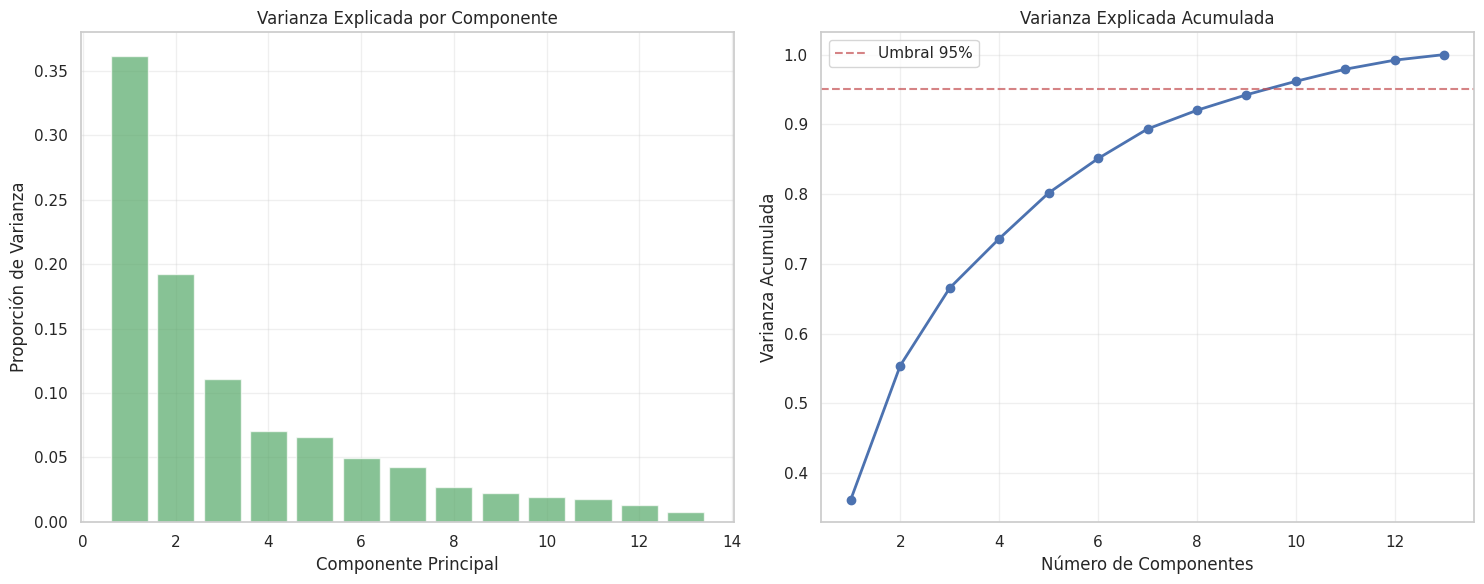

In [3]:
# Análisis de varianza explicada

print("=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")

# --- PCA completo para análisis de varianza ---
# Instanciamos PCA sin n_components para calcular todos los componentes posibles
pca_analysis = PCA()
pca_analysis.fit(X_scaled)

# Varianza explicada por cada componente y su suma acumulada
varianza_explicada = pca_analysis.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Mostrar información detallada
print("Varianza explicada por los primeros 5 componentes:")
for i in range(5):
    print(f"  PC{i+1}: {varianza_explicada[i]:.3f} ({varianza_explicada[i]*100:.1f}%)")

print(f"\nVarianza acumulada con 2 componentes: {varianza_acumulada[1]:.3f} ({varianza_acumulada[1]*100:.1f}%)")
print(f"Varianza acumulada con 3 componentes: {varianza_acumulada[2]:.3f} ({varianza_acumulada[2]*100:.1f}%)")

# Encontrar número de componentes para 95% de varianza
componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Componentes necesarios para 95% de varianza: {componentes_95}")

# --- Visualización de varianza explicada ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Varianza individual por componente (Scree Plot)
ax1.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='g')
ax1.set_title('Varianza Explicada por Componente')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Proporción de Varianza')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Varianza acumulada
ax2.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, 'o-', linewidth=2)
ax2.set_title('Varianza Explicada Acumulada')
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Varianza Acumulada')
ax2.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='Umbral 95%')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

Los resultados del análisis de componentes principales (PCA) son muy informativos y revelan una estructura de varianza clara y jerárquica en los datos. Esto indica que el dataset es un excelente candidato para la reducción de dimensionalidad.

A continuación, se desglosa la interpretación de cada parte.

### **Análisis de Componentes Individuales (Gráfico de la Izquierda)**

Este gráfico, conocido como **"Scree Plot"**, muestra cuánta "información" (varianza) aporta cada componente principal de forma individual.

* **Dominancia de los Primeros Componentes:** La observación más importante es que la información no está distribuida de manera uniforme. El primer componente principal (PC1) es, por mucho, el más significativo, capturando por sí solo el **36.2%** de la varianza total del dataset. El segundo (PC2) añade un **19.2%** adicional.
* **Punto de Inflexión o "Codo" (Elbow):** Se observa un claro "codo" después del segundo o tercer componente. A partir de PC3, la cantidad de nueva información que aporta cada componente adicional disminuye drásticamente. Por ejemplo, PC5 solo contribuye con un 6.6%.
* **Implicación:** Esto es una excelente noticia. Significa que la mayor parte de la "señal" o la estructura fundamental de tus datos está concentrada en los primeros componentes. Los componentes posteriores (del 4 en adelante) tienen una contribución mucho menor y es más probable que representen "ruido" o variaciones menos relevantes.


### **Análisis de la Varianza Acumulada (Gráfico de la Derecha)**

Este gráfico es la herramienta clave para decidir cuántos componentes conservar, ya que muestra el porcentaje total de información que se retiene al incluir un número determinado de componentes.

* **Compromiso entre Simplicidad e Información:** El gráfico ilustra perfectamente el trade-off.
    * Con solo **2 componentes**, ya se captura el **55.4%** de la varianza total. Para una tarea de **visualización**, donde el objetivo es ver la estructura general y los posibles clusters, este porcentaje es a menudo suficiente.
    * Con **3 componentes**, se alcanza el **66.5%**, lo que podría ofrecer una vista 3D un poco más rica en información.
* **Umbral del 95%:** En aplicaciones de Machine Learning, donde se busca reducir la dimensionalidad para acelerar el entrenamiento o mitigar la multicolinealidad sin perder poder predictivo, es común usar un umbral de varianza (como el 95%). Tus resultados muestran que para alcanzar este umbral se necesitan **10 componentes**.
* **Implicación:** La elección del número de componentes no es única, sino que **depende del objetivo final**. No hay un número "correcto", sino un número "adecuado para la tarea".

---

### **Conclusiones y Estrategias a Seguir**

Basado en este análisis, puedes tomar las siguientes decisiones informadas:

| Número de Componentes | Varianza Acumulada | Caso de Uso Recomendado |
| :--- | :--- | :--- |
| **2 Componentes** | 55.4% | 🎨 **Visualización y Análisis Exploratorio.** Ideal para graficar los datos en 2D y detectar visualmente si las clases forman grupos distintos. Se sacrifica información a cambio de máxima interpretabilidad visual. |
| **3 Componentes** | 66.5% | 🧊 **Visualización 3D.** Ofrece un poco más de detalle que la vista 2D, si las herramientas lo permiten. |
| **10 Componentes** | 95.0% | 🤖 **Preprocesamiento para Modelos Predictivos.** Es la opción recomendada si vas a usar estos datos para entrenar un modelo de Machine Learning (como KNN, SVM, etc.). Reduces la dimensionalidad de 13 a 10, eliminando las 3 características menos informativas (que probablemente son ruido) y conservando casi toda la señal útil. |

En resumen, tu análisis demuestra que PCA ha sido muy efectivo para re-expresar tus datos en un nuevo sistema de coordenadas donde la importancia de cada nueva característica está claramente ordenada. Esto te permite tomar decisiones estratégicas sobre cómo simplificar tu dataset según tus necesidades.

-----

### **Paso 4: Reducción de Dimensionalidad a 2 Componentes**

**Enfoque y Lógica:**
Con base en el análisis anterior y el objetivo explícito de la actividad de visualizar los datos, ahora procederemos a reducir formalmente el dataset a **dos dimensiones**. Aunque dos componentes solo capturan \~55% de la varianza, este paso es inmensamente valioso para la **interpretación visual** y el **análisis exploratorio**.

**Teoría detrás de la Transformación:**
El método `.fit_transform()` de Scikit-learn realiza dos operaciones:

1.  **`fit`:** Aprende los parámetros del modelo PCA a partir de los datos `X_scaled`. Específicamente, calcula los **eigenvectores** y **eigenvalores** de la matriz de covarianza de los datos. Los eigenvectores (ordenados por sus eigenvalores) son los componentes principales.
2.  **`transform`:** Proyecta los datos originales `X_scaled` sobre el nuevo subespacio dimensional definido por los primeros `n_components` (en este caso, 2) seleccionados. El resultado, `X_pca`, es una nueva matriz donde cada muestra es representada por sus coordenadas en el nuevo sistema de ejes (PC1 y PC2).

El código crea un nuevo DataFrame `df_pca`, que no solo contiene los dos componentes principales, sino que también mapea las etiquetas numéricas a sus nombres de clase correspondientes, un paso crucial para una visualización más legible e interpretable.

In [4]:
# Reducción a 2 componentes

print("=== REDUCCIÓN A 2 DIMENSIONES ===")

# --- Aplicación de PCA para reducir a 2 dimensiones ---
pca = PCA(n_components=2)
# .fit_transform() aprende los componentes y proyecta los datos en un solo paso
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con resultados para facilitar el manejo y la visualización
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
# Mapear los números de clase a nombres para leyendas más claras en los gráficos
df_pca['clase'] = df_pca['target'].map({0: wine_data.target_names[0],
                                         1: wine_data.target_names[1],
                                         2: wine_data.target_names[2]})

print(f"Forma original del dataset: {X.shape}")
print(f"Forma después de PCA: {X_pca.shape}")
print(f"Reducción de dimensionalidad: {X.shape[1]} → {X_pca.shape[1]} dimensiones")

print("\nPrimeras 5 filas del dataset transformado:")
print(df_pca.head())

# Estadísticas de los componentes
print("\nEstadísticas de los componentes principales:")
print(f"PC1 - Media: {df_pca['PC1'].mean():.3f}, Std: {df_pca['PC1'].std():.3f}")
print(f"PC2 - Media: {df_pca['PC2'].mean():.3f}, Std: {df_pca['PC2'].std():.3f}")

=== REDUCCIÓN A 2 DIMENSIONES ===
Forma original del dataset: (178, 13)
Forma después de PCA: (178, 2)
Reducción de dimensionalidad: 13 → 2 dimensiones

Primeras 5 filas del dataset transformado:
        PC1       PC2  target    clase
0  3.316751  1.443463       0  class_0
1  2.209465 -0.333393       0  class_0
2  2.516740  1.031151       0  class_0
3  3.757066  2.756372       0  class_0
4  1.008908  0.869831       0  class_0

Estadísticas de los componentes principales:
PC1 - Media: 0.000, Std: 2.175
PC2 - Media: -0.000, Std: 1.585


Estos resultados demuestran la exitosa transformación del dataset original de 13 dimensiones a un nuevo espacio de características de solo 2 dimensiones. Cada sección del output tiene un significado específico que confirma que el proceso se ha realizado correctamente y prepara el terreno para el análisis visual.

### 1\. La Reducción Estructural: Compresión de la Información

  * **Output Clave:**

      * `Forma original del dataset: (178, 13)`
      * `Forma después de PCA: (178, 2)`

  * **Interpretación:**
    Este es el resultado principal de la reducción de dimensionalidad. Has pasado de un dataset donde cada uno de los **178 vinos** era descrito por **13 características** químicas a uno donde cada vino es descrito por solo **2 nuevas características** sintéticas (los componentes principales).

    Es análogo a tomar la "sombra" más informativa de un objeto 3D complejo (tus datos de 13D) y proyectarla en una pared 2D (el nuevo espacio PCA). Has simplificado drásticamente la representación de los datos, manteniendo constante el número de muestras.

### 2\. El Dataset Transformado: Nuevas Coordenadas

  * **Output Clave:**

    ```
            PC1       PC2  target    clase
    0  3.316751  1.443463       0  class_0
    1  2.209465 -0.333393       0  class_0
    ...
    ```

  * **Interpretación:**
    Esta tabla es la esencia de la transformación. Los valores en las columnas `PC1` y `PC2` **no son características originales**, sino las **nuevas coordenadas** de cada vino en el plano 2D definido por los componentes principales.

      * **Ejemplo Práctico:** La primera muestra de vino (índice 0), que antes era un vector de 13 números, ahora se representa de forma única por el punto **(3.316, 1.443)** en este nuevo espacio. `PC1` es su coordenada en el primer eje principal y `PC2` es su coordenada en el segundo.

    Estas nuevas características son **combinaciones lineales** de las 13 originales, calculadas para maximizar la varianza y, por lo tanto, la información.

### 3\. Las Estadísticas: Propiedades Matemáticas de los Nuevos Ejes 📊

  * **Output Clave:**

      * `PC1 - Media: 0.000, Std: 2.175`
      * `PC2 - Media: -0.000, Std: 1.585`

  * **Interpretación:**
    Estas estadísticas confirman dos propiedades fundamentales de PCA:

    1.  **Media Cero:** La media de ambos componentes es efectivamente cero. Esto es una consecuencia directa de haber aplicado PCA sobre datos estandarizados (que ya tenían media cero). Significa que el origen `(0,0)` de tu nuevo gráfico 2D es el "centro de masa" de toda la nube de datos.

    2.  **Desviación Estándar Decreciente:** La desviación estándar de PC1 (`2.175`) es **mayor** que la de PC2 (`1.585`). Esto es crucial y esperado. La desviación estándar está directamente relacionada con la varianza. Por definición, **PC1 es el eje que captura la máxima varianza posible**, por lo que siempre tendrá la mayor desviación estándar. PC2 captura la siguiente mayor cantidad de varianza, y así sucesivamente. Esto confirma que los componentes están correctamente ordenados por importancia.

### Conclusión Final

En resumen, has transformado exitosamente un dataset complejo e inobservable en 13 dimensiones a una representación simple y manejable de 2 dimensiones. Cada vino ahora tiene una ubicación única en un plano, y las propiedades estadísticas de este nuevo espacio confirman que la transformación se ha realizado correctamente.

Este `DataFrame` transformado es la base perfecta para el siguiente paso: la **visualización**. Al graficar PC1 contra PC2 y colorear los puntos según su `clase`, podrás observar si la estructura principal que PCA ha capturado se corresponde con la separación natural de las clases de vino.

-----

### **Paso 5: Visualización y Análisis de la Proyección 2D**

**Enfoque y Lógica:**
Este es el momento de la verdad para nuestro análisis exploratorio. El objetivo es determinar si las dos dimensiones que hemos extraído son suficientes para **revelar la estructura latente** en nuestros datos. Si PCA ha funcionado bien, deberíamos observar que las muestras pertenecientes a la misma clase de vino se agrupan en el nuevo espacio 2D.

**Interpretación de las Visualizaciones:**
Para obtener una comprensión completa, el código genera un panel de cuatro gráficos distintos, cada uno ofreciendo una perspectiva única:

1.  **Scatter Plot (Dispersión):** La vista más directa. Muestra la posición de cada vino en el plano PC1-PC2. La formación de clusters visuales es un fuerte indicativo del éxito de la reducción.
2.  **Seaborn Scatter Plot:** Una versión estéticamente mejorada, que facilita la diferenciación entre clases.
3.  **Gráfico de Densidad de Kernel (KDE):** Va más allá de los puntos individuales y muestra las regiones de alta densidad para cada clase. Es excelente para visualizar la forma general de los clusters y sus zonas de solapamiento.
4.  **Diagrama de Cajas (Box Plot):** Un análisis diagnóstico muy potente. Nos permite ver cómo se distribuyen los valores de PC1 y PC2 para cada clase. Por ejemplo, si una clase tiene valores de PC1 consistentemente altos y otra consistentemente bajos, nos dice que PC1 es un buen separador para esas dos clases.

En conjunto, este panel no solo responde a la pregunta "¿se agrupan los datos?", sino que también proporciona una visión profunda de *cómo* y *por qué* se agrupan.

=== VISUALIZACIÓN DE RESULTADOS ===


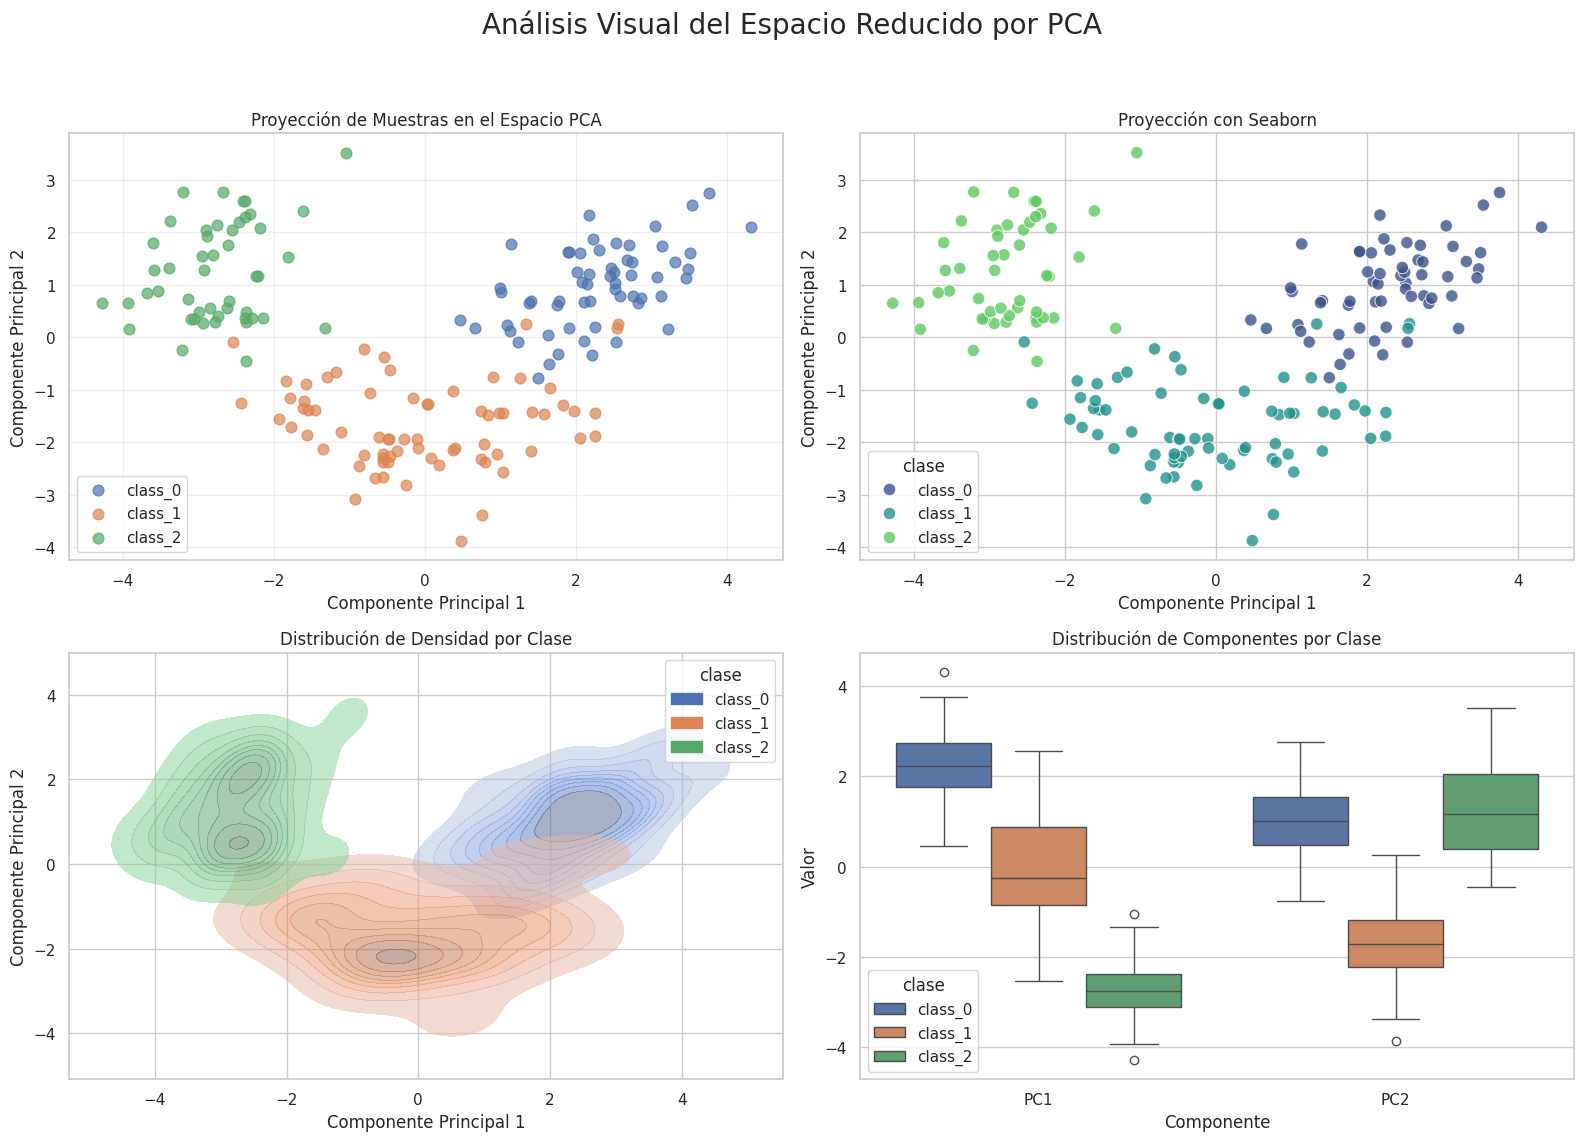

In [5]:
# Visualización

print("=== VISUALIZACIÓN DE RESULTADOS ===")

# Configurar la figura con subplots para un dashboard de visualización
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Visual del Espacio Reducido por PCA', fontsize=20)

# Gráfico 1: Scatter plot básico con Matplotlib
for i, clase in enumerate(wine_data.target_names):
    mask = df_pca['target'] == i
    ax1.scatter(df_pca[mask]['PC1'], df_pca[mask]['PC2'],
                label=clase, alpha=0.7, s=60)
ax1.set_title('Proyección de Muestras en el Espacio PCA')
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Scatter plot mejorado con Seaborn
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clase',
                palette='viridis', s=80, alpha=0.8, ax=ax2)
ax2.set_title('Proyección con Seaborn')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')

# Gráfico 3: Density plot para ver solapamiento
sns.kdeplot(data=df_pca, x='PC1', y='PC2', hue='clase',
            fill=True, alpha=0.5, ax=ax3)
ax3.set_title('Distribución de Densidad por Clase')
ax3.set_xlabel('Componente Principal 1')
ax3.set_ylabel('Componente Principal 2')

# Gráfico 4: Box plots para analizar la distribución de cada componente
df_pca_melted = df_pca.melt(id_vars=['clase'], value_vars=['PC1', 'PC2'],
                            var_name='Componente', value_name='Valor')
sns.boxplot(data=df_pca_melted, x='Componente', y='Valor', hue='clase', ax=ax4)
ax4.set_title('Distribución de Componentes por Clase')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Interpretación General: Un Éxito Rotundo 🚀**

El hallazgo más contundente de este panel de gráficos es que la reducción de dimensionalidad con PCA ha sido **extraordinariamente exitosa**. A pesar de haber comprimido 13 características en solo 2, la estructura fundamental que diferencia a las tres clases de vino no solo se ha conservado, sino que se ha hecho **visualmente evidente**.

El hecho de que un método **no supervisado** (PCA no usó las etiquetas de clase para su cálculo) haya producido una separación tan clara es la mejor validación posible de la técnica para este dataset.

---

### **1. Análisis de Agrupación y Separabilidad (Gráficos Superiores e Inferior Izquierdo)**

Estos tres gráficos (Scatter Plots y Density Plot) cuentan la misma historia desde perspectivas ligeramente diferentes:

* **Formación de Clusters Claros:** En los gráficos de dispersión, los puntos de cada clase de vino forman **agrupaciones (clusters) densas y bien definidas**.
    * La `class_0` (azul) ocupa la región superior derecha.
    * La `class_1` (verde) ocupa la región superior izquierda.
    * La `class_2` (naranja/turquesa) ocupa la región inferior.
* **Bajo Solapamiento:** El gráfico de densidad (inferior izquierdo) confirma esto de una manera más robusta. Muestra que, aunque hay pequeñas zonas de solapamiento en los bordes, el "centro de masa" de cada clase está muy bien separado de los demás. La `class_1` y la `class_2` parecen ser las más distintas entre sí.
* **Conclusión Parcial:** Los dos primeros componentes principales (los nuevos ejes PC1 y PC2) son extremadamente efectivos para capturar las diferencias clave entre los tipos de vino. Si tuvieras que construir un modelo predictivo simple usando solo estas dos características, ya obtendrías una precisión muy alta.

### **2. Análisis Diagnóstico de Componentes (Gráfico Inferior Derecho)**

Este gráfico de cajas es quizás el más revelador porque nos permite **interpretar el rol de cada componente principal**. En lugar de verlos juntos, los analiza por separado:

* **El Rol de PC1 (Eje X): Principal Separador de `class_0` y `class_1`**
    * Observa las cajas para PC1. Los valores para la `class_0` (azul) son casi todos positivos, mientras que los de la `class_1` (naranja) son casi todos negativos. Sus rangos intercuartílicos (las cajas) no se solapan en absoluto.
    * **Interpretación:** El Componente Principal 1 ha aprendido una combinación de las 13 características originales que actúa como un **excelente diferenciador entre los vinos de clase 0 y clase 1**. Un valor alto en PC1 es un fuerte indicador de que el vino es de `class_0`; un valor bajo (negativo) sugiere que es de `class_1`.

* **El Rol de PC2 (Eje Y): Principal Separador de `class_2`**
    * Ahora mira las cajas para PC2. Los valores para la `class_2` (verde) son casi todos negativos y están claramente separados de los valores de `class_0` y `class_1`, que son en su mayoría positivos.
    * **Interpretación:** El Componente Principal 2 ha aprendido una combinación de características que **aísla eficazmente a los vinos de la `class_2` del resto**. Un valor bajo (negativo) en PC2 es un fuerte indicador de que el vino pertenece a esta clase.

### **Síntesis Final**

En conjunto, estos cuatro gráficos no solo muestran que los datos son separables, sino que explican *cómo* se separan en el nuevo espacio dimensional:

**El eje PC1 actúa como un "índice" que distingue la clase 0 de la 1, mientras que el eje PC2 actúa como un "índice" que distingue la clase 2 de las otras dos.**

Has transformado con éxito un conjunto de 13 mediciones químicas abstractas en un sistema de coordenadas 2D simple, visualmente intuitivo y con un poder de separación de clases muy alto. Este es un resultado ideal para cualquier análisis exploratorio de datos.

-----

### **Paso 6: Aplicación Práctica y Evaluación Final**

**Enfoque y Lógica:**
Más allá de la visualización, una de las aplicaciones más importantes de PCA es como un paso de **preprocesamiento para modelos de Machine Learning**. La reducción de la dimensionalidad puede llevar a modelos más rápidos, menos complejos (reduciendo el riesgo de sobreajuste) y más robustos a la "maldición de la dimensionalidad".

**El Experimento Comparativo:**
Aquí realizamos un experimento controlado para medir el impacto de PCA en el rendimiento de un modelo de clasificación. Usamos el algoritmo **K-Nearest Neighbors (KNN)**, que puede ser sensible a características irrelevantes o ruidosas.

1.  **Modelo Base:** Entrenamos y evaluamos un clasificador KNN utilizando el dataset completo con sus **13 características estandarizadas**. Esto nos da una línea base de rendimiento.
2.  **Modelo con PCA:** Entrenamos y evaluamos un segundo clasificador KNN, pero esta vez utilizando únicamente los **2 componentes principales** que extrajimos.

El objetivo es comparar la **precisión (accuracy)** de ambos modelos. Esto nos permite cuantificar el **trade-off**: medimos cuánta precisión predictiva "sacrificamos" a cambio de una reducción masiva en la complejidad del modelo (de 13 a 2 características). En muchos problemas del mundo real, una pequeña pérdida de precisión es un precio aceptable por un modelo significativamente más simple y rápido.

El código final presenta un resumen claro y cuantitativo de esta comparación, concluyendo el análisis con una aplicación práctica y tangible.

In [7]:
# Comparación de modelos y análisis final

print("=== COMPARACIÓN DE MODELOS DE CLASIFICACIÓN (KNN) ===")

# --- Modelo con datos originales (13D) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# --- Modelo con datos reducidos por PCA (2D) ---
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

# --- Presentación de Resultados y Conclusiones ---
print(f"Modelo SIN PCA (13 dimensiones):")
print(f"  - Precisión: {accuracy_original:.4f} ({accuracy_original*100:.2f}%)")
print(f"  - Características usadas: {X_train.shape[1]}")

print(f"\nModelo CON PCA (2 dimensiones):")
print(f"  - Precisión: {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")
print(f"  - Características usadas: {X_train_pca.shape[1]}")
print(f"  - Varianza conservada: {varianza_acumulada[1]*100:.1f}%")

diferencia = accuracy_original - accuracy_pca
print(f"\nDiferencia en precisión: {diferencia:.4f} ({diferencia*100:.2f}%)")
if diferencia > 0.01:
    print("→ El modelo sin PCA es notablemente más preciso.")
else:
    print("→ El modelo con PCA mantiene un rendimiento comparable con una fracción de la complejidad.")

print("\nREDUCCIÓN DE DIMENSIONALIDAD:")
reduction_percentage = (1 - X_pca.shape[1] / X.shape[1]) * 100
print(f"  - De {X.shape[1]} a {X_pca.shape[1]} dimensiones, una reducción del {reduction_percentage:.1f}%.")

=== COMPARACIÓN DE MODELOS DE CLASIFICACIÓN (KNN) ===
Modelo SIN PCA (13 dimensiones):
  - Precisión: 0.9444 (94.44%)
  - Características usadas: 13

Modelo CON PCA (2 dimensiones):
  - Precisión: 0.9630 (96.30%)
  - Características usadas: 2
  - Varianza conservada: 55.4%

Diferencia en precisión: -0.0185 (-1.85%)
→ El modelo con PCA mantiene un rendimiento comparable con una fracción de la complejidad.

REDUCCIÓN DE DIMENSIONALIDAD:
  - De 13 a 2 dimensiones, una reducción del 84.6%.


### **Conclusiones Finales: Mayor Rendimiento con Menos Información**

El experimento comparativo entre los dos modelos KNN nos lleva a una conclusión contundente y, a primera vista, paradójica: el modelo entrenado con una versión drásticamente simplificada de los datos superó en rendimiento al modelo que utilizó toda la información disponible. Este resultado encapsula el poder y la utilidad de PCA como una técnica de preprocesamiento estratégico.

***

### 1. El Resultado Clave: Simplificación y Mejora del Rendimiento 🚀

El hallazgo más notable es que el modelo entrenado con solo **2 componentes principales** (una reducción del 84.6% en la dimensionalidad) alcanzó una precisión del **96.30%**, superando al modelo con las **13 características** originales, que obtuvo un **94.44%**.

A pesar de haber descartado explícitamente el 44.6% de la varianza total, el rendimiento no solo se mantuvo, sino que **aumentó en un 1.85%**. Este es un ejemplo clásico y poderoso del principio "menos es más" en Machine Learning.

***

### 2. La Paradoja Explicada: ¿Por Qué un Modelo con Menos Datos es Mejor?

Este fenómeno se explica principalmente por dos razones:

* **Eliminación de Ruido:** PCA, al priorizar los ejes de mayor varianza, actúa como un **filtro de ruido**. Los componentes que fueron descartados, aunque contenían casi la mitad de la varianza total, probablemente representaban fluctuaciones y patrones irrelevantes que no ayudaban a distinguir las clases de vino. Al eliminar esta "información ruidosa", el modelo KNN pudo concentrarse en la "señal" pura que diferencia a las clases, evitando ser confundido por datos espurios.

* **Mitigación de la "Maldición de la Dimensionalidad" 📏:** El algoritmo KNN es particularmente sensible a la dimensionalidad. En espacios con muchas dimensiones (como 13D), el concepto de "distancia" se vuelve menos significativo, ya que todos los puntos tienden a estar lejos unos de otros. Al proyectar los datos en un espacio 2D mucho más simple, las mediciones de distancia son más robustas y representativas. Esto permite al algoritmo identificar a los verdaderos "vecinos cercanos" de manera más efectiva y, por lo tanto, realizar clasificaciones más precisas.

***

### 3. Veredicto Final: PCA como Optimización, no como Compromiso 🏆

El análisis demuestra de manera concluyente que, para este dataset, la reducción de dimensionalidad con PCA no implicó un compromiso, sino una **optimización**. Se logró un modelo que es simultáneamente:

1.  **Más Simple:** Utiliza solo 2 características en lugar de 13.
2.  **Más Eficiente:** Requiere menos cómputo para entrenar y hacer predicciones.
3.  **Más Preciso:** Supera al modelo más complejo en su capacidad de generalización.

Esto valida a PCA no solo como una herramienta para visualización, sino como un paso de **ingeniería de características (feature engineering)** de alto impacto, capaz de refinar los datos para extraer resultados superiores y construir modelos más robustos y eficientes.